<a href="https://colab.research.google.com/github/maushamkumar/Indian-Startup-Funding-/blob/main/startup_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/startup_cleaned.csv')

In [3]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
0,2018-01-10,Northmist,Fashion,Mens Wear,Delhi,Prashant Jaiswal,Seed/ Angel Funding,0.000008
1,2018-04-09,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,0.000008
2,2018-05-09,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI\\xc2\\xa0,Private Equity,0.000008
3,2018-01-08,HealthFin,Finance,Patient Financing Platform,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,0.000008
4,2018-01-07,Leena AI,Technology,HR Virtual Agent For Employees,Gurugram,Y Combinator,Seed/ Angel Funding,0.000008


<Axes: ylabel='amount'>

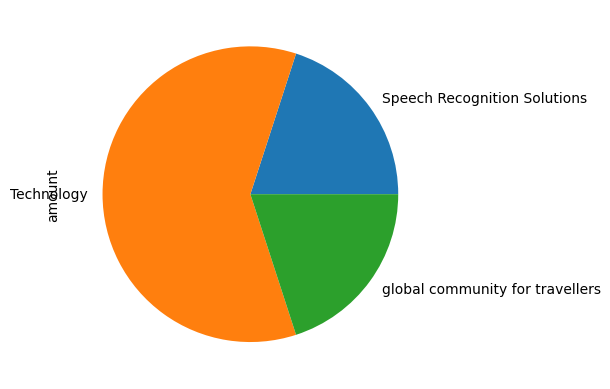

In [6]:
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

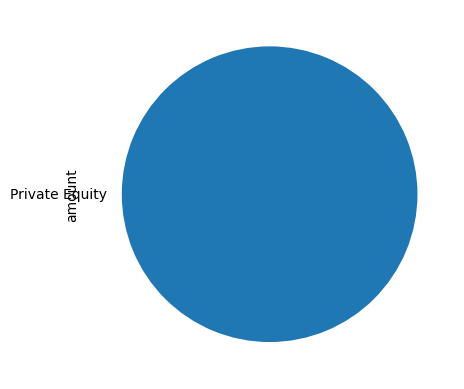

In [7]:
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

In [9]:
df['round'].unique()

array(['Seed/ Angel Funding', 'Private Equity', 'Seed / Angel Funding',
       'Seed funding', 'Angel / Seed Funding', 'Seed/Angel Funding',
       'Seed Funding'], dtype=object)

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

In [10]:
# Year-on-year investment graph (line chart)
df['year'] = df['date'].dt.year

In [5]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2822 non-null   object 
 1   startup      2822 non-null   object 
 2   vertical     2822 non-null   object 
 3   subvertical  2078 non-null   object 
 4   city         2822 non-null   object 
 5   investors    2822 non-null   object 
 6   round        2822 non-null   object 
 7   amount       2822 non-null   float64
dtypes: float64(1), object(7)
memory usage: 176.5+ KB


<Axes: ylabel='amount'>

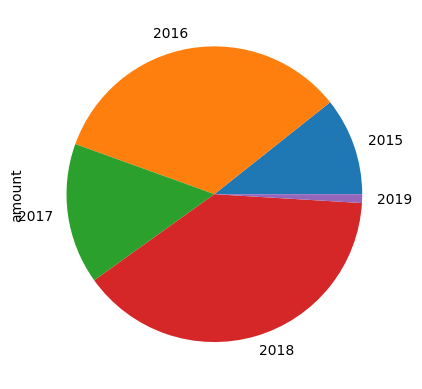

In [11]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot(kind='pie')

In [14]:
round(df['amount'].sum(), 2)

296491.8

In [18]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

32175.0

In [20]:
round(df.groupby('startup')['amount'].sum().mean(), 3)

128.96554857057416

In [23]:
df['startup'].nunique()

2299

In [25]:
df['month'] = df['date'].dt.month

In [27]:
# No. of funding
df.groupby(['year', 'month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [29]:
# Total amount of funding
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()

In [34]:
temp_df['x_axis'] = temp_df['month'].astype(str) + '-' + temp_df['year'].astype(str)

In [35]:
temp_df

,year,month,amount,x_axi,x_axis
0,2015,1,5274.637500,1-2015,1-2015
1,2015,2,1567.178250,2-2015,2-2015
2,2015,3,1910.658750,3-2015,3-2015
3,2015,4,4511.058750,4-2015,4-2015
4,2015,5,1401.427500,5-2015,5-2015
...,...,...,...,...,...
58,2019,12,3667.125000,12-2019,12-2019
59,2020,1,140.649250,1-2020,1-2020
60,2020,2,39.600000,2-2020,2-2020
61,2020,9,1801.460595,9-2020,9-2020


In [37]:
temp_df[['amount', 'x_axis']]

,amount,x_axis
0,5274.637500,1-2015
1,1567.178250,2-2015
2,1910.658750,3-2015
3,4511.058750,4-2015
4,1401.427500,5-2015
...,...,...
58,3667.125000,12-2019
59,140.649250,1-2020
60,39.600000,2-2020
61,1801.460595,9-2020
